In [1]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Scikit Learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image

##Custom made modules

#Dimensionality Reduction
from lda import LDA

#Classification
from bayes import bayes_nonparametric
from knn import KNN #???? maybe not


/Users/chris/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Datacleaning and scaling
Some quick data transformation and splitting

In [2]:
# Load data
trainDataNP = np.load("fashion_train.npy")
testDataNP = np.load("fashion_test.npy")

# Split data into X and y arrays
X_train = trainDataNP[:, :-1]
y_train = trainDataNP[:, -1]
X_test = testDataNP[:, :-1]
y_test = testDataNP[:, -1]

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Dimenisonality reduction
Reducing feature dimensionalities through a custom made LDA model and SKlearns PCA

In [71]:
# Load custom made LDA from lda.py and project to 2 discriminant variables
lda2 = LDA(n_components=2)
X_train_projected = lda2.fit_transform(X_train_scaled, y_train)
X_test_projected = lda2.transform(X_test_scaled)

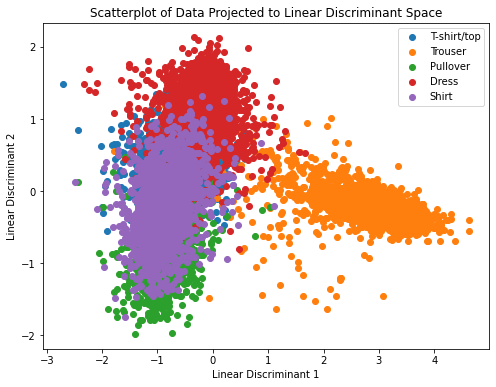

In [33]:
# Initializing class labels for plot
class_labels = np.unique(y_train)

label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

plt.figure(figsize=(8, 6))

# Creating a scatter plot
for idx, class_label in enumerate(class_labels):
    class_data = X_train_projected[y_train == class_label]
    fig = plt.scatter(class_data[:, 0], class_data[:, 1], label=label_names[class_label])

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('Scatterplot of Data Projected to Linear Discriminant Space')
plt.legend()
plt.show()

In [4]:
# Load sklearn's PCA and project to 2 principal components

##FIIIXIXXX MAKE SAME WAY AS LDA 
sklearnPCA = PCA()
scaler = StandardScaler()

pipeline = Pipeline([('scaling', scaler), ('pca', PCA(n_components=2))])
pipe_X_train = pipeline.fit_transform(X_train)

sklearnPCA.fit(pipe_X_train, y_train)
sk_projected_data = sklearnPCA.transform(pipe_X_train)

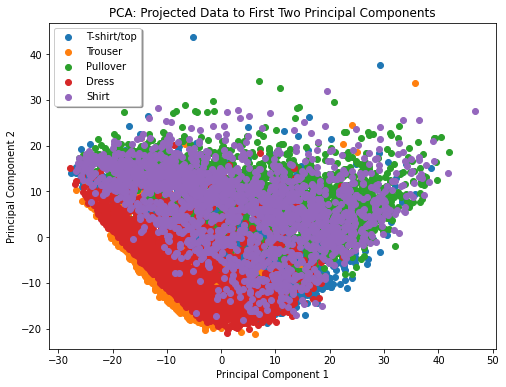

In [5]:
# Initializing class labels for plot
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

plt.figure(figsize=(8, 6))

# Creating a scatter plot and plotting each class separately
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(sk_projected_data[indices, 0], sk_projected_data[indices, 1], label=label_names[label])

plt.title('PCA: Projected Data to First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(shadow=True)
    
plt.show()

## Classification
Classification through a custom made Naive Bayes Model and the further two methods being respcitvely a (CUSTOM?) KNN and a CNN model.

In [60]:
# Function created to be able to return best parameters with regards to the accuaracy of the Models below
def find_max_values(dictionary):
    if not dictionary:
        return None  # Return None for an empty dictionary

    max_value = max(dictionary.values())
    max_keys = [key for key, value in dictionary.items() if value == max_value]

    return max_keys

In [65]:
## Bayes Naive Classifier Model

# Here with two first Linear Discriminant variables
# For loop with the custom made bayes naive classifier, iterating over all the bandwidths, finding the optimal bandwith(s)
bandwiths = np.linspace(.01, 1, 100)
scores_bayes = {}
for bw in bandwiths:
    bayes = bayes_nonparametric(h = bw)
    bayes.fit(X_train_projected, y_train)
    y_pred = bayes.predict(X_test_projected)
    scores_bayes[round(bw, 2)] = accuracy_score(y_test, y_pred)

resultBayes = find_max_values(scores_bayes)
if resultBayes:
    print(f"The bandwidth(s) with maximum value(s) in the dictionary is/are {resultBayes} with a value of {scores_bayes[resultBayes[0]]}")
else:
    print("The dictionary is empty.")

KeyboardInterrupt: 

In [58]:
## K nearest neighbours model

# On whole dataset:
scores_KNN_ovr = {}
for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores = accuracy_score(y_pred=y_pred, y_true=y_test)
    scores_KNN_ovr[k] = scores
    print(k)


resultKNNovr = find_max_values(scores_KNN_ovr)
if resultKNNovr:
    print(f"The k neighbour(s) with maximum value(s) in the dictionary is/are {resultKNNovr} with a value of {scores_KNN_ovr[resultKNNovr[0]]}")
else:
    print("The dictionary is empty.")



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
The bandwidth(s) with maximum value(s) in the dictionary is/are [8] with a value of 0.8262


In [78]:
# With LDA as dimenisonality reduction

# Load custom made LDA from lda.py and project to respectively 3 and 4 (max) discriminant variables
lda3 = LDA(n_components=3)
X_train_projected_3 = lda3.fit_transform(X_train_scaled, y_train)
X_test_projected_3 = lda3.transform(X_test_scaled)

lda4 = LDA(n_components=4)
X_train_projected_4 = lda4.fit_transform(X_train_scaled, y_train)
X_test_projected_4 = lda4.transform(X_test_scaled)

In [80]:
# for model in ['lda2', 'lda3', 'lda4']:

# For 2 LDv's
scores_KNNlda2 = {}

for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_projected, y_train)
    y_pred = knn.predict(X_test_projected)
    scores = accuracy_score(y_pred=y_pred, y_true=y_test)
    scores_KNNlda2[k] = scores

resultKNNlda2 = find_max_values(scores_KNNlda2)
if resultKNNlda2:
    print(f"The k neighbour(s) with maximum value(s) in the dictionary for lda2 is/are {resultKNNlda2} with a value of {scores_KNNlda2[resultKNNlda2[0]]}")
else:
    print("The dictionary is empty.")

# For 3 LDv's
scores_KNNlda3 = {}

for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_projected_3, y_train)
    y_pred = knn.predict(X_test_projected_3)
    scores = accuracy_score(y_pred=y_pred, y_true=y_test)
    scores_KNNlda3[k] = scores

resultKNNlda3 = find_max_values(scores_KNNlda3)
if resultKNNlda3:
    print(f"The k neighbour(s) with maximum value(s) in the dictionary for lda3 is/are {resultKNNlda3} with a value of {scores_KNNlda3[resultKNNlda3[0]]}")
else:
    print("The dictionary is empty.")

    
# For 4 LDv's
scores_KNNlda4 = {}

for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_projected_4, y_train)
    y_pred = knn.predict(X_test_projected_4)
    scores = accuracy_score(y_pred=y_pred, y_true=y_test)
    scores_KNNlda4[k] = scores

resultKNNlda4 = find_max_values(scores_KNNlda4)
if resultKNNlda4:
    print(f"The k neighbour(s) with maximum value(s) in the dictionary for lda4 is/are {resultKNNlda4} with a value of {scores_KNNlda4[resultKNNlda4[0]]}")
else:
    print("The dictionary is empty.")

The k neighbour(s) with maximum value(s) in the dictionary for lda2 is/are [18] with a value of 0.7306
The k neighbour(s) with maximum value(s) in the dictionary for lda3 is/are [18] with a value of 0.7748
The k neighbour(s) with maximum value(s) in the dictionary for lda4 is/are [16] with a value of 0.8166


In [70]:
# With PCA as dimenisonality reduction

# 
scores_KNNpca= {}

PCA_knn = PCA(n_components=0.95)
PCA_knn.fit(X_train_scaled, y_train)
train_proj = PCA_knn.transform(X_train_scaled)
test_proj = PCA_knn.transform(X_test_scaled)

for k in range (1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_proj, y_train)
    y_pred = knn.predict(test_proj)
    scores = accuracy_score(y_pred=y_pred, y_true=y_test)
    scores_KNNpca[k] = scores
    print(k)

resultKNNpca = find_max_values(scores_KNNpca)
if resultKNNpca:
    print(f"The k neighbour(s) with maximum value(s) in the dictionary is/are {resultKNNpca} with a value of {scores_KNNpca[resultKNNpca[0]]}")
else:
    print("The dictionary is empty.")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
The k neighbour(s) with maximum value(s) in the dictionary is/are [6] with a value of 0.8308


In [ ]:
# for k in range (1,10):
#     knn = KNN(n_neighbors=k)
#     scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
#     print(k, round(np.mean(scores), 4))